In [10]:

import pandas as pd
PData = pd.read_csv("Parachor_data.csv")

#### 1. Plot $\sigma$ vs $\rho'$ and $\sigma$ vs $\rho'^4$, where $\sigma$ is the surface tension (mN/m) and $\rho$’ is the liquid density $(g/cm^3)$. Fit a linear regression analysis for the second plot.

$\sigma = \left( \frac{P}{M_w} \rho \right)^4 $  = $ \frac{P^4}{M^4_w} \rho^4$

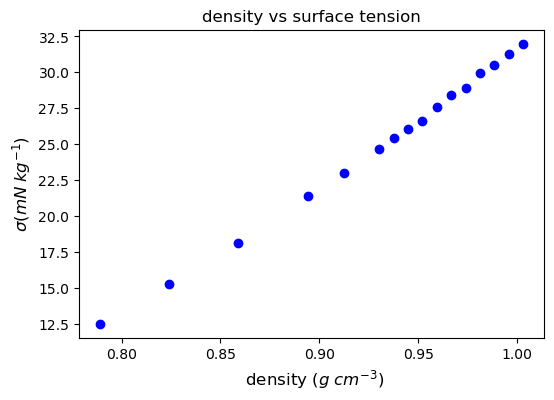

In [11]:
import matplotlib.pyplot as plt
from scipy import stats

x = PData["density_g_cm^3"]
y = PData["surface_tension_mN/m"]

plt.scatter(x, y, label='density vs surface tension', color='blue')
plt.xlabel(" density $  (g \; cm^{-3}$)", fontsize = 12, )
plt.ylabel("$ \sigma (mN  \; kg^{-1}$)", fontsize = 12)
plt.gcf().set_size_inches(6, 4)
plt.title("density vs surface tension")
plt.show() 



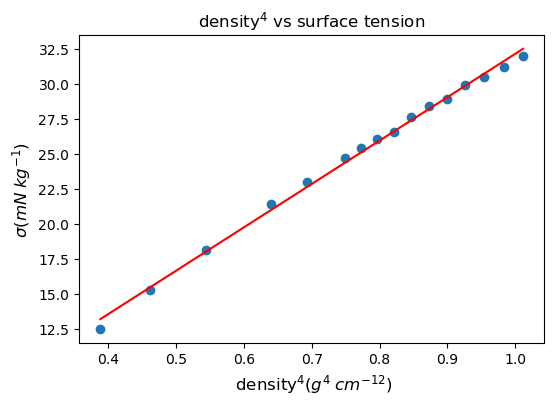

Slope: 30.995648125341155 cm^3/g


In [12]:
import matplotlib.pyplot as plt
from scipy import stats

x = PData["density^4"]
y = PData["surface_tension_mN/m"]

plt.scatter(x, y, label='original data')

plt.xlabel(" density$^4  (g ^4  \; cm^{-12}$)", fontsize = 12, )
plt.ylabel("$ \sigma (mN  \; kg^{-1}$)", fontsize = 12)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.gcf().set_size_inches(6, 4)
plt.title("density$^4$ vs surface tension")
plt.show()

print('Slope:', slope, "cm^3/g")


#### 2. Find the Parachor of TOTM, the molar mass of TOTM is reported in Table 1.

In [13]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.9966778773816082
p_value: 9.368479344078367e-19
slope: 30.995648125341155
intercept: 1.163610607559896


Since $M_w$ = 546.78 g/mol we can obtain the parachour by using the next equation $ P = slope^{1/4}M_w $

In [14]:
P= slope**(1/4) * 546.78
print("Parachor:", P, "cm^3/mol")

Parachor: 1290.1428538334574 cm^3/mol


#### 3. Use the Parachor to estimate the surface tension at 333.07 K. Compare with the tabulated value

At T = 333.07 

$\rho$' = 0.95929 $g/cm^3$
 
P= 1290.142854 $cm^3/mol$

$M_w$ = 546.78 g/mol

Using the following equation we'll be able to find the surface tension ar 333.07 K:

$\rho = \left( \frac{P}{M_w} \rho \right)^4$

In [15]:
rho = (P/546.78 * 0.95929)**4
print("Surface tension at 333.07 K:", rho, "mN/m")

Surface tension at 333.07 K: 26.248252244417436 mN/m


#### 4. If the critical exponent n=11/9 describes the behavior of ln $\sigma$ vs ln (1- T/Tc),find an estimated critical temperature of the TOTM.

In [16]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
T_data = PData["Temperature_K"].values
sigma_data = PData["surface_tension_mN/m"].values
n = 11 / 9

def surface_tension_model(T, sigma0, Tc):
    return sigma0 * (1 - T / Tc) ** n

initial_guess = [sigma_data[0], max(T_data) + 10]  # rough starting point

popt, pcov = curve_fit(surface_tension_model, T_data, sigma_data, p0=initial_guess)

sigma0_fit, Tc_fit = popt
print("Estimated sigma_0:", sigma0_fit)
print("Estimated T_c:", Tc_fit, "K")

Estimated sigma_0: 52.054276027783416
Estimated T_c: 823.1165174310531 K
